Right now I am going to create my baseline model to estimate if the pretrained keras models work better than a simple network.

In [1]:
from tensorflow.keras.applications import VGG16, InceptionV3, InceptionResNetV2
from keras.applications.resnet50 import ResNet50
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.4.1
2.4.0


I create a network with 2 convolutional layers and MaxPooling, as an activation function I choose 'relu' due to the previous research. Last layer has 120 neurons because of 120 dog breeds that I have in my train dataset.

In [2]:
h,w = 300, 300

model = Sequential()
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(h,w,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(260, activation='relu'))
model.add(Dense(120, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 296, 296, 8)       608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 16)      3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 260)               21565700  
_________________________________________________________________
dense_1 (Dense)              (None, 120)               3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

optimizer = RMSprop(lr = 0.0001, rho = 0.99)

model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

train_data_dir = r'C:\Users\Jakub\Desktop\Projekt Dog Breed\dog-breed-identification\train_new'
validation_data_dir = r'C:\Users\Jakub\Desktop\Projekt Dog Breed\dog-breed-identification\validation_new'
epochs = 50
batch_size = 16

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   rotation_range=45, 
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size=(h, w), 
                                                    batch_size=batch_size, 
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(h, w), 
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 7822 images belonging to 120 classes.
Found 2400 images belonging to 120 classes.


In [4]:
history = History()
early_stopping = EarlyStopping(patience=5,monitor="val_loss")
save_best_model = ModelCheckpoint(r'C:\Users\Jakub\Desktop\GitHubProjects\dog_breed_classifier\baseline_model.h5',save_best_only=True)

model.fit(train_generator, batch_size=batch_size, epochs=epochs, 
                    validation_data=validation_generator,  callbacks=[early_stopping, history, save_best_model])

Epoch 1/50
489/489 [==============================] - 469s 958ms/step - loss: 5.0061 - accuracy: 0.0150 - val_loss: 4.7640 - val_accuracy: 0.0142
Epoch 2/50
489/489 [==============================] - 470s 961ms/step - loss: 4.6815 - accuracy: 0.0268 - val_loss: 4.6617 - val_accuracy: 0.0229
Epoch 3/50
489/489 [==============================] - 459s 939ms/step - loss: 4.5423 - accuracy: 0.0373 - val_loss: 4.5646 - val_accuracy: 0.0342
Epoch 4/50
489/489 [==============================] - 456s 932ms/step - loss: 4.4333 - accuracy: 0.0432 - val_loss: 4.4753 - val_accuracy: 0.0383
Epoch 5/50
489/489 [==============================] - 454s 927ms/step - loss: 4.3332 - accuracy: 0.0548 - val_loss: 4.4933 - val_accuracy: 0.0408
Epoch 6/50
489/489 [==============================] - 452s 923ms/step - loss: 4.2245 - accuracy: 0.0715 - val_loss: 4.4272 - val_accuracy: 0.0446
Epoch 7/50
489/489 [==============================] - 452s 924ms/step - loss: 4.2024 - accuracy: 0.0715 - val_loss: 4.4047 -

We can clearly see that custom convolutional neural network is not even near the pretrained model when it comes to val_accuracy. It is necessary to use pretrained Keras Neural Network

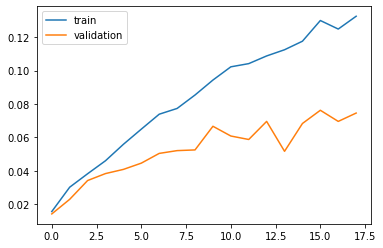

In [7]:
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "validation")


plt.legend()
plt.show()